**chapter3 预处理与无监督学习**
- @date: 2024-07-14

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import mglearn

---
# 无监督学习的概念
- 无监督学习: 训练集不含已知输出的机器学习算法
- 无监督学习包括: 变换和聚类
- 无监督变换(unsupervised transformation): 创建数据新的表示的算法, 常用应用为降维 
- 聚类算法(clustering algorithm): 将数据划分成不同的组, 每组包含相似的物项
- 评估无监督学习的唯一方法是人工检查

---
# 预处理(特征缩放)
- 一些算法(例如神经网络和SVM)对特征分布非常敏感
- 特征缩放可以看成无监督算法, 通过特征缩放创建了数据的新的表示, 可以提高监督学习的精度
- 注意: 不同的特征缩放算法应当作用在训练集上, 得到的scaler再作用在测试集上

## 4种数据缩放方法
1. StandardScaler: 
    * 使每个特征的平均值为0, 方差为1, 特征都在一个数量级上
    * 不保证每个特征都有特定的最大值和最小值
2. RobustScaler:
    * 类似StandardScale, 但是使用的是中位数和四分位数
    * 这样会减少异常值的影响
3. MinMaxScaler:
    * 使每个特征都在0-1范围内
4. Normalizer:
    * 不同于对特征操作, 其对数据点操作, 使每个数据点在特征空间的欧式长度为1

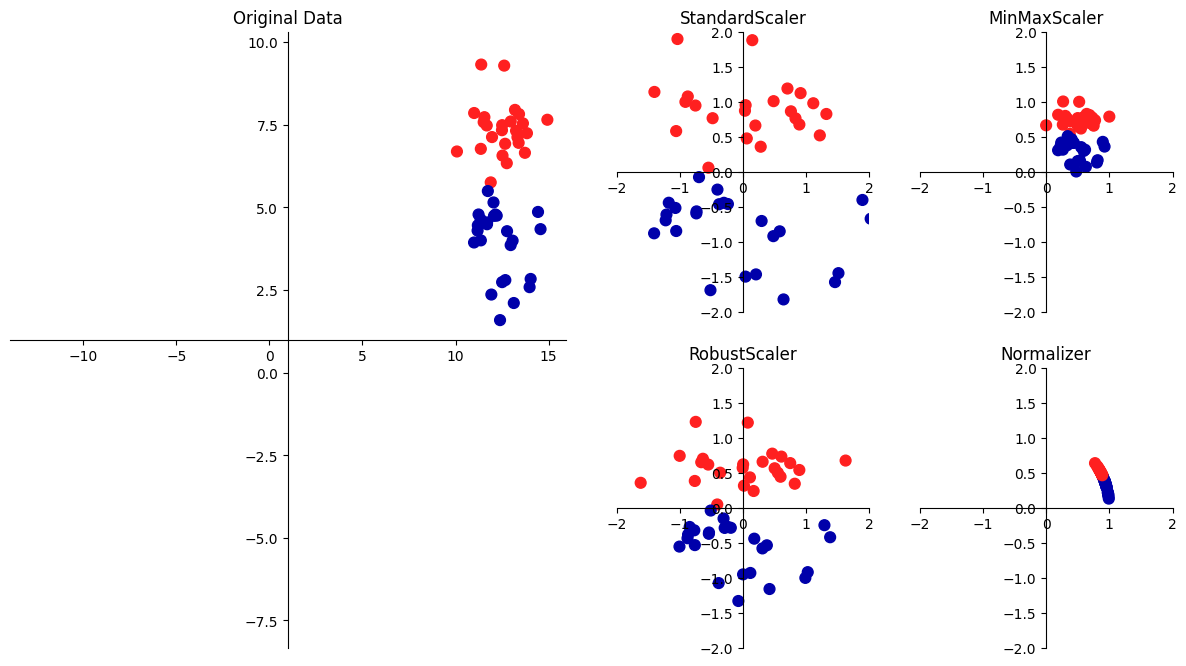

In [2]:
mglearn.plots.plot_scaling()

## cancer数据集实战

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# 划分数据集
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

# 数据缩放
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)  # 使用训练集的均值和方差来缩放数据

# 对训练集和测试集进行缩放
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.svm import SVC
# 无数据缩放的SVM
svm = SVC(C=100)
svm.fit(X_train, y_train)
print("无数据缩放的SVM测试集得分: {:.2f}".format(svm.score(X_test, y_test)))

# 有数据缩放的SVM
svm.fit(X_train_scaled, y_train)
print("有数据缩放的SVM测试集得分: {:.2f}".format(svm.score(X_test_scaled, y_test)))

无数据缩放的SVM测试集得分: 0.94
有数据缩放的SVM测试集得分: 0.97


---
# 降维
* 降维是一种技术，目的常用于数据可视化，压缩数据，寻找信息量更大的数据表示等
* 最常用的方法是PCA（主成分分析），特征提取也常用NMF（非负矩阵分解），数据可视化常用t-SNE

## 主成分分析(PCA)
* PCA是一种旋转数据集的方法，旋转后，新的特征之间相互独立，然后在新的特征中按照重要性选择出一个子集作为主成分
* 具体操作：
    1. 找到特征空间中方差最大的方向，即此方向包含最多的信息，为第一主成分
    2. 然后在第一主成分的正交方向（二维只有一个方向，三维为平面）上找方差最大的方向为第二主成分
* 找到的主成分的维度与原特征维度相同，相当于坐标轴旋转

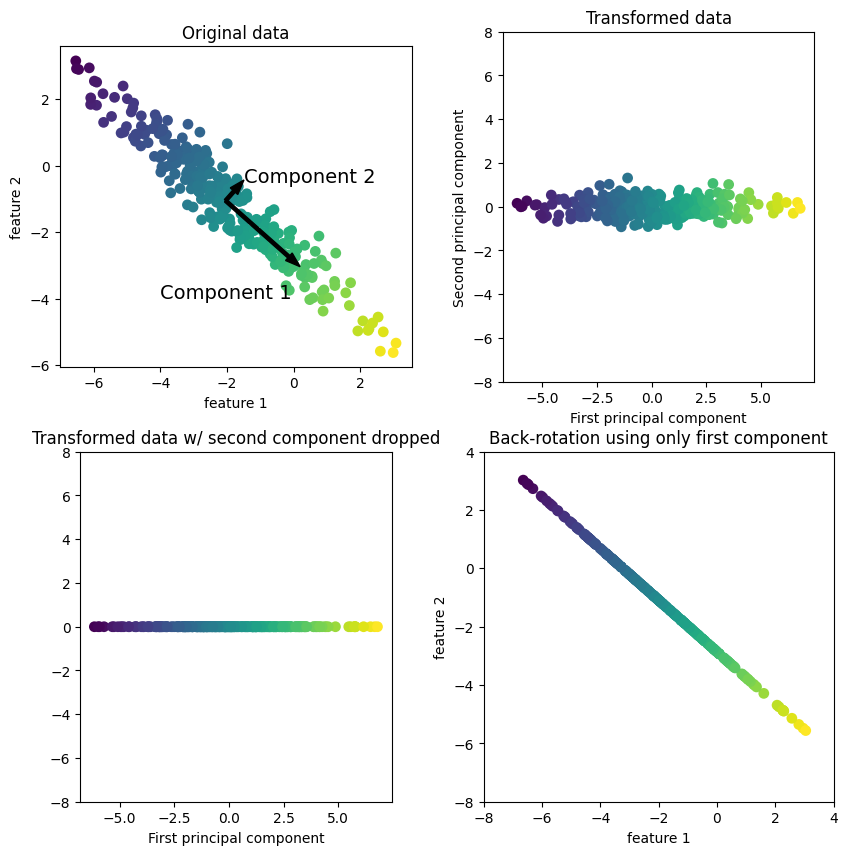

In [4]:
# PCA示意图
mglearn.plots.plot_pca_illustration()

### 实例1: PCA做高维数据可视化

简单可视化：为每个特征创建直方图
* 优势：观测不同类别的分布，可以看到哪些特征可以更好地做分类
* 缺点：无法看到变量之间的相关关系，和相关关系跟类别的联系

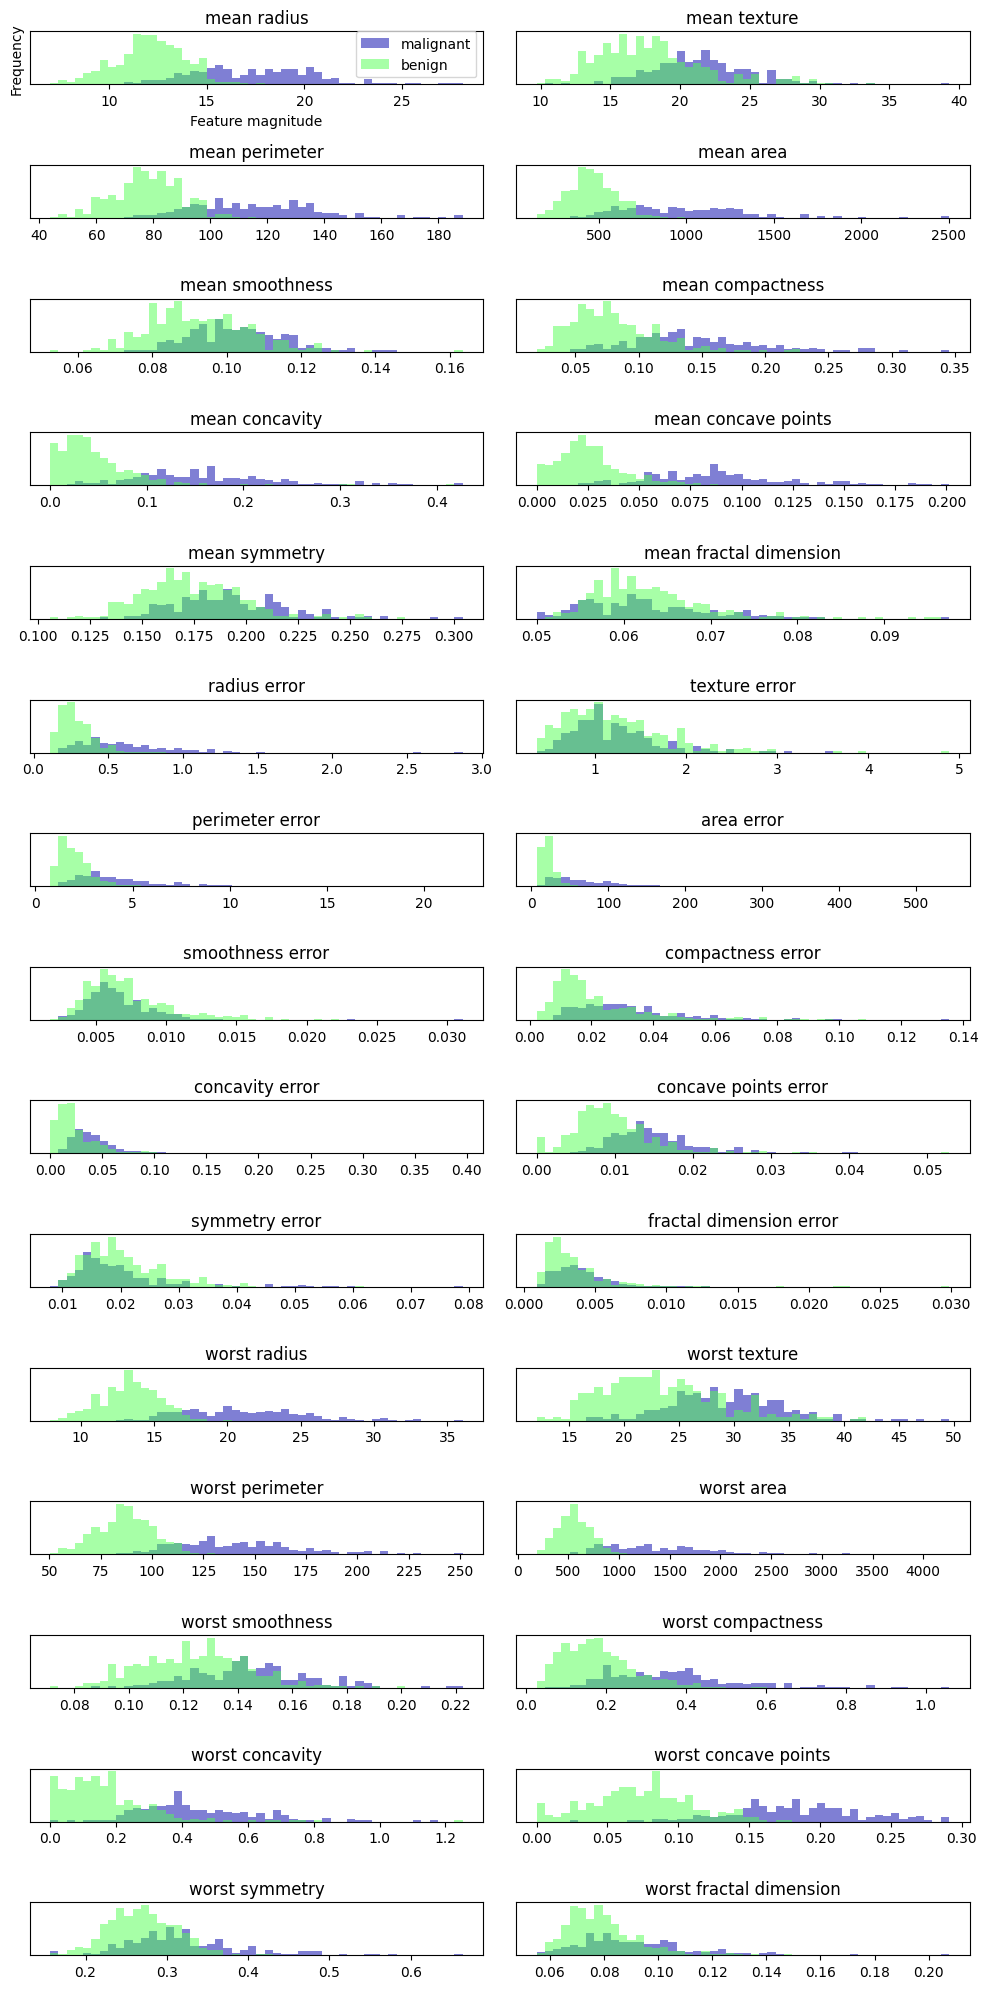

In [5]:
# 按类别对每个特征的分布可视化
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()
for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

PCA降维可视化
* 高维特征经过PCA降成2维后, 就可以进行相关性的可视化
* 如果在2维主成分空间中可以看到明显划分, 说明线性分类器也可以区分的很好

Original shape: (569, 30)
Reduced shape: (569, 2)


Text(0, 0.5, 'Second principal component')

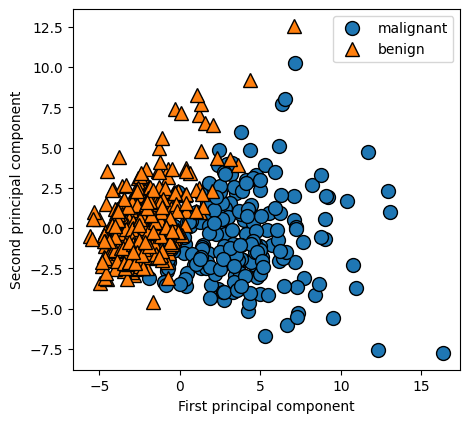

In [6]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# 特征缩放(使每个特征的方法都为1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

from sklearn.decomposition import PCA
# 保留前两个主成分
pca = PCA(n_components=2)
pca.fit(X_scaled)

# 将数据转换为前两个主成分的方向上
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

# 绘制前两个主成分作可视化
plt.figure(figsize=(5, 5))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

使用热图将PCA系数可视化

PCA component shape: (2, 30)
PCA components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'Principal components')

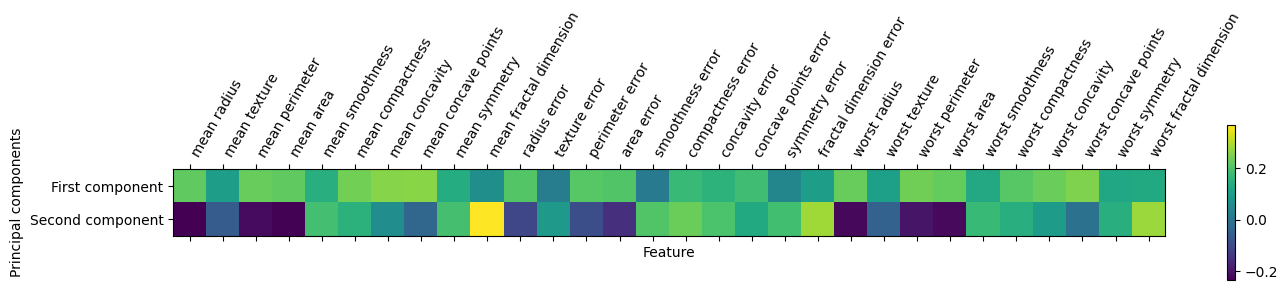

In [7]:
print("PCA component shape: {}".format(pca.components_.shape))
print("PCA components:\n{}".format(pca.components_))

plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

### 实例2: PCA做图像的特征提取

In [8]:
# 下载人脸图像数据集
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
image_shape  # 图像的大小

(87, 65)

In [9]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1  # 每个人最多取50张图像

X_people = people.data[mask]
y_people = people.target[mask]

# 将灰度值缩放到0-1之间
X_people = X_people / 255.

kNN方法

In [10]:
from sklearn.neighbors import KNeighborsClassifier

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)
# 使用一个邻居的KNN分类器
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("1-邻居的KNN测试集得分: {:.2f}".format(knn.score(X_test, y_test)))

1-邻居的KNN测试集得分: 0.22


使用PCA提取前100个主成分作为新的特征

In [11]:
pca = PCA(n_components=100, whiten=True, random_state=0)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape: {}".format(X_train_pca.shape))

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("1-邻居的KNN测试集得分(PCA): {:.2f}".format(knn.score(X_test_pca, y_test)))

X_train_pca.shape: (1547, 100)
1-邻居的KNN测试集得分(PCA): 0.30


## 非负矩阵分解 (NMF)
- non-negative matrix factorization
- 简介：与PCA相同，NMF每个数据点写成一些分量的加权求和。并且要求分量和系数非负。
- 特点：
    1. 这种方法只能应用在每个特征都是非负的数据
    2. NMF对于多个独立源相加创建而成的数据特别有用
    3. 与PCA相比，NMF得到的分量更容易解释（因为PCA中的负分量导致难以解释抵消效应）
- NMF的主要参数是要提取的分量个数，这个数字要小于特征数量
- NMF通常不用于对数据进行重建或编码，而是用于在数据中寻找有趣的模式

### 实例1: 叠加信号的模式提取

(2000, 3)
(2000, 100)


Text(0, 0.5, 'Signal')

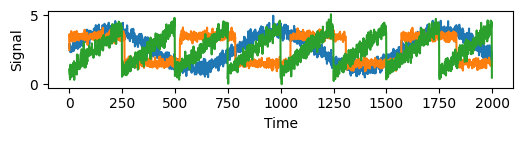

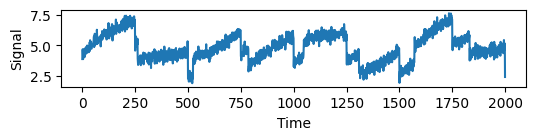

In [20]:
# S为3个独立信号
S = mglearn.datasets.make_signals()
print(S.shape)
plt.figure(figsize=(6, 1))
plt.plot(S, '-')
plt.xlabel("Time")
plt.ylabel("Signal")

# 混合3个信号来生成观察数据
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print(X.shape)  # 共计生成100个叠加信号

# 展示其中1个
plt.figure(figsize=(6, 1))
plt.plot(X.T[0], '-')
plt.xlabel("Time")
plt.ylabel("Signal")

In [21]:
# 使用NMF来恢复信号
from sklearn.decomposition import NMF
S_ = NMF(n_components=3).fit_transform(X)
print(f"Recovered signal shape: {S_.shape}")

# 使用PCA来恢复信号作为对比
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)

Recovered signal shape: (2000, 3)


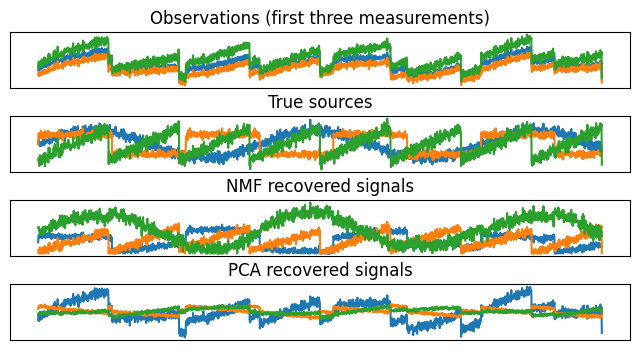

In [22]:
models = [X, S, S_, H]
names = ['Observations (first three measurements)', 'True sources', 'NMF recovered signals', 'PCA recovered signals']
fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5}, subplot_kw={'xticks': (), 'yticks': ()})
for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

# 可见NMF恢复的信号与原始信号更为相似，而PCA则无法恢复原始信号

## 流形学习算法做数据可视化
- 流形学习算法允许进行更复杂的映射，通常可以给出更好的可视化
- 其中特别有用的一个是，t-SNE算法
- 流行学习主要用于可视化，因此很少用来生成2个以上的特征，也不能变换新数据


### 实例1: 手写数字图像识别的可视化

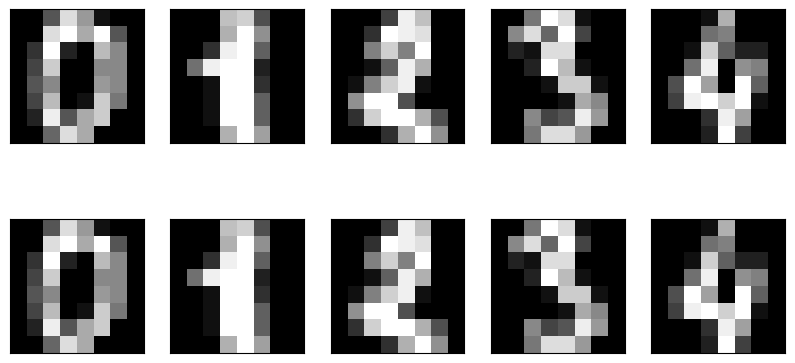

In [33]:
from sklearn.datasets import load_digits
digits = load_digits()  # 包含1797个8x8像素的图像

# 展示前10个图像
fig, axes = plt.subplots(2, 5, figsize=(10, 5), subplot_kw={'xticks': (), 'yticks': ()})
for ax, img in zip(axes.T, digits.images):
    ax[0].imshow(img, cmap='gray')
    ax[1].imshow(img, cmap='gray')

Text(0, 0.5, 'Second principal component')

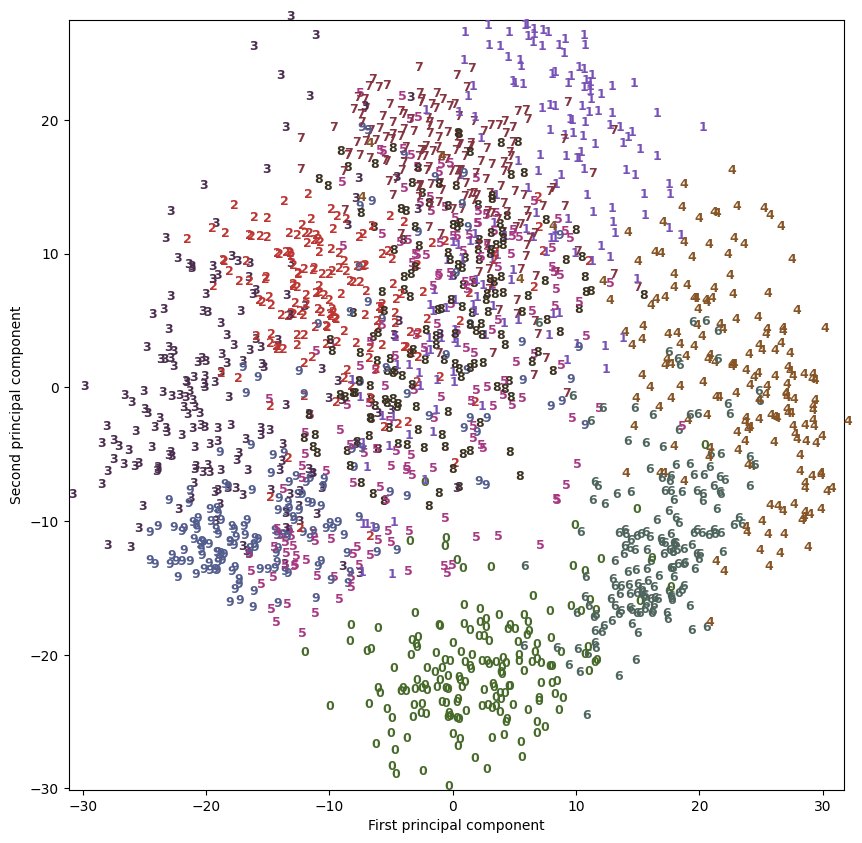

In [34]:
# 使用PCA做可视化
pca = PCA(n_components=2)
pca.fit(digits.data)

# 将数据转换到前两个主成分的方向上
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525", "#A83683", 
          "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]), 
             color=colors[digits.target[i]], fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

Text(0, 0.5, 't-SNE feature 1')

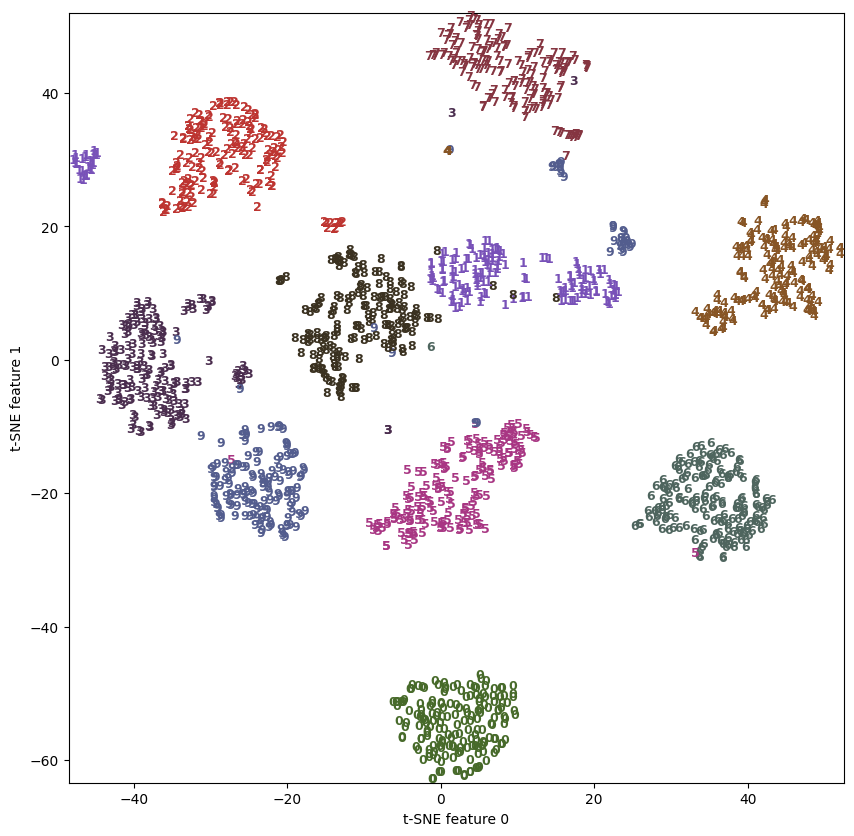

In [35]:
# 使用t-SNE做可视化
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
digits_tsne = tsne.fit_transform(digits.data)

plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max()+1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max()+1)
for i in range(len(digits.data)):
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]), 
             color=colors[digits.target[i]], fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")

# 聚类